## Linear Classification

`Objectives:`
- Linear Classification
- Loss Functions
 - Multi-class SVM Loss function (hinge loss)
 - Multi-class Logistic Regression loss function (cross-entopy or softmax)
- Optimization
- Gradient Descent Algorithm

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import classification_function_folder.layers
from classification_function_folder.data_utils import load_CIFAR10
 
plt.rcParams['figure.figsize'] = (12.0 , 6.0)   #set default size of plots
plt.rcParams['image.interpolation'] = 'spline16'
plt.rcParams['image.cmap'] = 'gray'

In [17]:
np.set_printoptions(formatter={'all': lambda x: '%.2f' %x})

#### CIFAR-10 Data Loading and Preprocessing

In [18]:
from classification_function_folder.data_utils import load_CIFAR10
cifar10_dir = './datasets/cifar-10-batches-py'
x_train , y_train , x_test , y_test = load_CIFAR10(cifar10_dir)

print("training data shape:      " , x_train.shape)
print("training labels shape:    " , y_train.shape)
print("test data shape:          " , x_test.shape)
print("test labels shape:        " , y_test.shape)

training data shape:       (50000, 32, 32, 3)
training labels shape:     (50000,)
test data shape:           (10000, 32, 32, 3)
test labels shape:         (10000,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

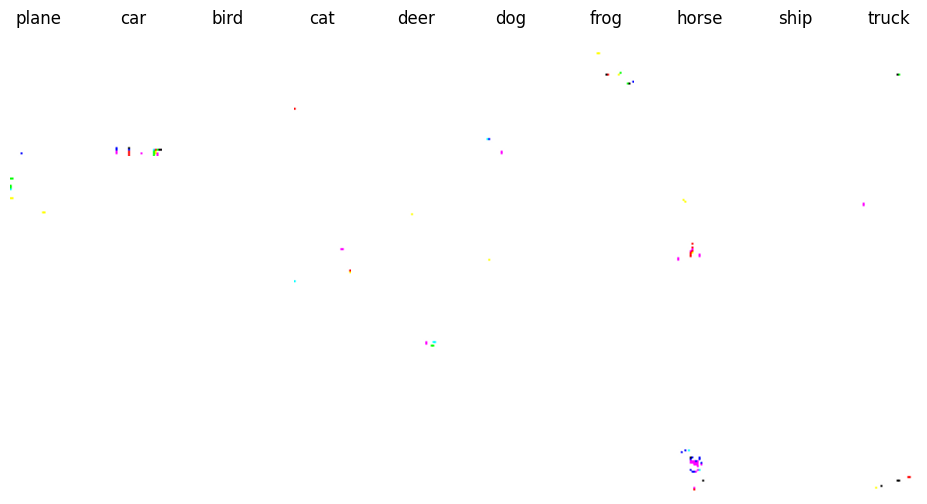

In [19]:
#visualize some examples from the dataset.
#we show a few example of training images from each class.
classes = ['plane' , 'car' , 'bird' , 'cat' , 'deer' , 'dog' , 'frog' , 'horse' , 'ship' , 'truck']
num_classes = len(classes)
samples_per_classes = 7
for y , cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs , samples_per_classes , replace=False)
    for i , idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_classes , num_classes , plt_idx)
        plt.imshow(x_train[idx])
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()